In [1]:
%load_ext autoreload
%autoreload 2
    
import os
os.chdir('/engram/nklab/hossein/recurrent_models/transformer_brain_encoder/')
!pwd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
import matplotlib.pyplot as plt

import numpy as np
import torch
# import torchvision.transforms as T
from PIL import Image
import torchvision.transforms as transforms
from datasets.nsd_utils import roi_maps, plot_on_brain
from datasets.nsd import fetch_dataloaders

from brain_encoder_wrapper import brain_encoder_wrapper


/engram/nklab/hossein/recurrent_models/transformer_brain_encoder


In [2]:
#################################
# model = brain_encoder_wrapper()
# model_name = 'default'
##################################
subj=1
enc_output_layer=[1, 3, 5, 7]

readout_res= 'rois_all'
runs= np.arange(1, 6) 

# readout_res= 'voxels'
# runs= np.arange(1, 3)

model = brain_encoder_wrapper(subj=subj, readout_res=readout_res, enc_output_layer=enc_output_layer, runs=runs)

model_name = 'model'
model_name += 'Voxels' if readout_res == 'voxels' else ''
model_name += 'Layer' + ''.join([str(cur) for cur in enc_output_layer])
model_name += 'Runs' + ''.join([str(cur) for cur in runs])
##################################
print(model_name)

Run 1 Backbone Layer 1 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 1 Backbone Layer 3 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 1 Backbone Layer 5 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 1 Backbone Layer 7 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 2 Backbone Layer 1 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 2 Backbone Layer 3 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 2 Backbone Layer 5 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 2 Backbone Layer 7 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 3 Backbone Layer 1 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 3 Backbone Layer 3 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 3 Backbone Layer 5 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 3 Backbone Layer 7 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 4 Backbone Layer 1 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 4 Backbone Layer 3 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 4 Backbone Layer 5 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 4 Backbone Layer 7 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 5 Backbone Layer 1 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 5 Backbone Layer 3 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 5 Backbone Layer 5 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


Run 5 Backbone Layer 7 Device cuda:0


Using cache found in /home/ms5724/.cache/torch/hub/facebookresearch_dinov2_main


lh_corr_sm (4, 19004)
lh_corr_sm torch.Size([20, 19004])
modelLayer1357Runs12345


100%|██████████| 500/500 [05:16<00:00,  1.58it/s]


[array(-0.31161704), array(0.39752366), array(0.38317732), array(0.37360923), array(0.37090842), array(0.36861499)]


100%|██████████| 500/500 [05:42<00:00,  1.46it/s]


[array(-0.50974447), array(1.57709532), array(1.55112945), array(1.53278522), array(1.51415589), array(1.48781034)]


100%|██████████| 500/500 [05:41<00:00,  1.46it/s]


[array(-0.81815014), array(1.59198439), array(1.46148979), array(1.38477729), array(1.34672716), array(1.34618549)]


100%|██████████| 500/500 [05:42<00:00,  1.46it/s]


[array(-0.24024807), array(0.68822099), array(0.67651274), array(0.66553373), array(0.65050594), array(0.64524996)]


100%|██████████| 500/500 [05:17<00:00,  1.57it/s]


[array(-0.17265814), array(0.4394515), array(0.43709982), array(0.43650671), array(0.43420707), array(0.42356672)]


100%|██████████| 500/500 [05:17<00:00,  1.58it/s]


[array(-0.16073251), array(1.69058687), array(1.68751047), array(1.67113418), array(1.65988204), array(1.65710184)]


100%|██████████| 500/500 [05:17<00:00,  1.58it/s]


[array(-0.53482939), array(1.71500931), array(1.66633139), array(1.65906949), array(1.64453858), array(1.64221294)]


100%|██████████| 500/500 [05:17<00:00,  1.58it/s]


[array(-0.25454902), array(0.79809707), array(0.77721743), array(0.77716052), array(0.77487493), array(0.77436582)]


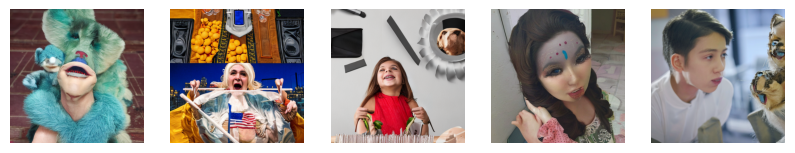

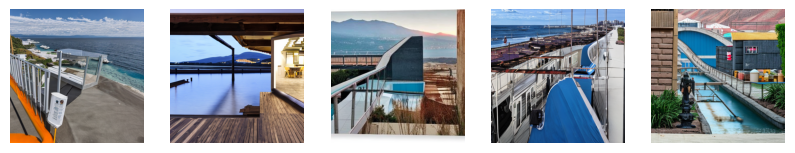

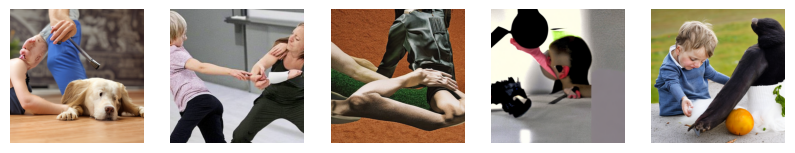

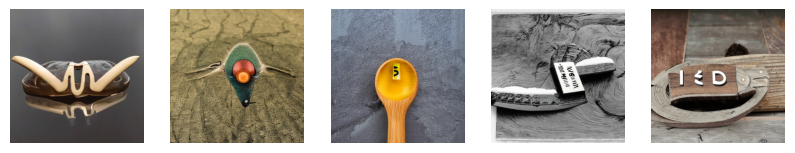

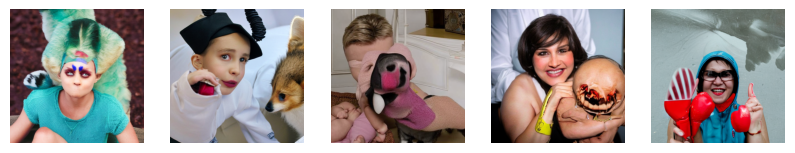

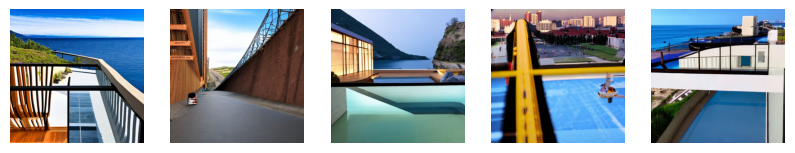

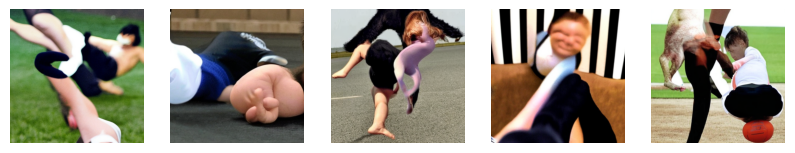

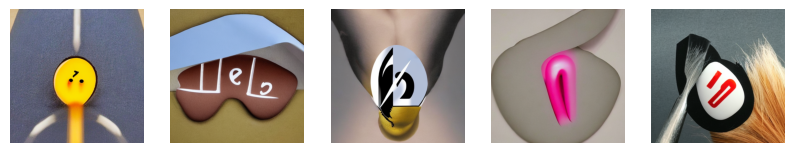

In [7]:
from tqdm import tqdm

for sfx in ['', '_detachk']:
    for rois_list in [['OFA', 'FFA-1', 'FFA-2'], 
                      ['OPA', 'PPA', 'RSC'], 
                      ['EBA', 'FBA-1', 'FBA-2'], 
                      ['OWFA', 'VWFA-1', 'VWFA-2']]:
        rois_str = '_'.join(rois_list)
        
        lh_challenge_rois = []
        rh_challenge_rois = []
        for roi in rois_list:
            roi_ind = model.lh_roi_names.index(roi)
            lh_challenge_rois.append(model.lh_challenge_rois[roi_ind]) 
            rh_challenge_rois.append(model.rh_challenge_rois[roi_ind])
        lh_challenge_rois = torch.clip(torch.stack(lh_challenge_rois).sum(0), min=0, max=1).cpu().numpy()
        rh_challenge_rois = torch.clip(torch.stack(rh_challenge_rois).sum(0), min=0, max=1).cpu().numpy()
        
        preprocess = transforms.Compose([
                     transforms.ToTensor(),
                     transforms.Normalize(
                        mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])])
        
        mean_act_arr = []
        for seed in tqdm(range(500)):
            image_path = f'/engram/nklab/ms5724/transformer_brain_encoder/images/{model_name}/{rois_str}{sfx}_seed{seed}.png'
            image = Image.open(image_path)
            img = preprocess(image)
            patch_size = 14
            size_im = (img.shape[0], int(np.ceil(img.shape[1] / patch_size) * patch_size),
                        int(np.ceil(img.shape[2] / patch_size) * patch_size),)
            paded = torch.zeros(size_im)
            paded[:, : img.shape[1], : img.shape[2]] = img
            imgs = paded[None, :,:,:]
            
            with torch.no_grad():
                outputs = model.forward(imgs)
                rois_acts = torch.mean(outputs[0] * torch.tensor(lh_challenge_rois).cuda(), axis=1) 
                rois_acts += torch.mean(outputs[1] * torch.tensor(rh_challenge_rois).cuda(), axis=1)
                mean_act = torch.mean(rois_acts)
                mean_act_arr.append(mean_act.cpu().numpy())
        
        np.save(f'/engram/nklab/ms5724/transformer_brain_encoder/images/{rois_str}_{model_name}{sfx}_mean_acts.npy', mean_act_arr)
        
        idxs = np.argsort(mean_act_arr)
        print([mean_act_arr[idxs[cur]] for cur in [0, -1, -2, -3, -4, -5]])
        fig, axes = plt.subplots(1, 5, figsize=(10, 2))
        for i in range(1, 6):
            seed = np.arange(500)[idxs[-i]]
            image_path = f'/engram/nklab/ms5724/transformer_brain_encoder/images/{model_name}/{rois_str}{sfx}_seed{seed}.png'
            image = Image.open(image_path)
            axes[i-1].imshow(image)
            axes[i-1].axis('off')
        fig.savefig(f'/engram/nklab/ms5724/transformer_brain_encoder/images/{rois_str}_{model_name}{sfx}_top_5.png', bbox_inches='tight')

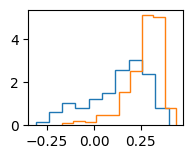

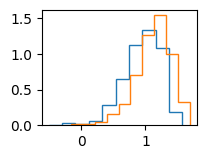

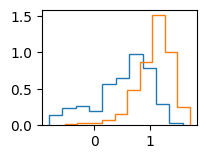

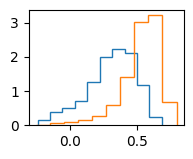

In [10]:
for rois_list in [['OFA', 'FFA-1', 'FFA-2'], 
                  ['OPA', 'PPA', 'RSC'], 
                  ['EBA', 'FBA-1', 'FBA-2'], 
                  ['OWFA', 'VWFA-1', 'VWFA-2']]:
    rois_str = '_'.join(rois_list)
    fig, ax = plt.subplots(1, 1, figsize=(2, 1.5))
    for isfx, sfx in enumerate(['', '_detachk']):
        mean_act_arr = np.load(f'/engram/nklab/ms5724/transformer_brain_encoder/images/{rois_str}_{model_name}{sfx}_mean_acts.npy')
        _ = ax.hist(mean_act_arr, histtype='step', density=True, color=f'C{isfx}')

In [3]:
##################################
if model.model is not None:
    cur_model = model.model
    cur_model.lr_backbone = 1 # otherwise no gradient in brain_encoder line 68
    for name, param in cur_model.named_parameters():
        param.requires_grad = False
else:
    for cur_model in model.models:
        cur_model.lr_backbone = 1
        for name, param in cur_model.named_parameters():
            param.requires_grad = False

In [4]:
import sys
import os
import torch
import numpy as np
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from brain_guide_pipeline import mypipelineSAG
import pickle
import gc
import nibabel as nib
import os
import time

In [5]:
repo_id = "stabilityai/stable-diffusion-2-1-base"
pipe = mypipelineSAG.from_pretrained(repo_id, torch_dtype=torch.float16, revision="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe2 = pipe.to("cuda")

unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

104.50854420661926


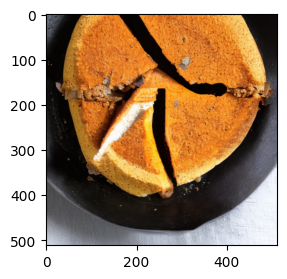

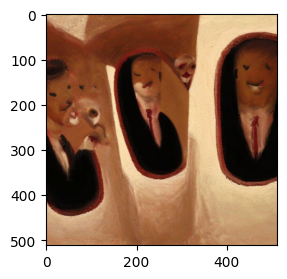

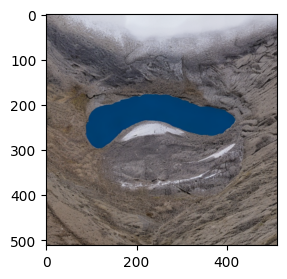

In [6]:
# ['V1v', 'V1d', 'V2v', 'V2d', 'V3v', 'V3d', 'hV4', 
#  'EBA', 'FBA-1', 'FBA-2', 'mTL-bodies', 
#  'OFA', 'FFA-1', 'FFA-2', 'mTL-faces', 'aTL-faces', 
#  'OPA', 'PPA', 'RSC', 'OWFA', 'VWFA-1', 'VWFA-2', 'mfs-words', 'mTL-words']

# rois_list = ['OFA', 'FFA-1', 'FFA-2']
# rois_list = ['OPA', 'PPA', 'RSC']
# rois_list = ['EBA', 'FBA-1', 'FBA-2']
rois_list = ['OWFA', 'VWFA-1', 'VWFA-2']
rois_str = '_'.join(rois_list)
lh_challenge_rois = []
rh_challenge_rois = []
for roi in rois_list:
    roi_ind = model.lh_roi_names.index(roi)
    lh_challenge_rois.append(model.lh_challenge_rois[roi_ind]) 
    rh_challenge_rois.append(model.rh_challenge_rois[roi_ind])
lh_challenge_rois = torch.clip(torch.stack(lh_challenge_rois).sum(0), min=0, max=1).cpu().numpy()
rh_challenge_rois = torch.clip(torch.stack(rh_challenge_rois).sum(0), min=0, max=1).cpu().numpy()


def loss_function(image_input):
    outputs = model.forward(image_input)
    rois_acts = torch.mean(outputs[0] * torch.tensor(lh_challenge_rois).cuda(), axis=1) 
    rois_acts += torch.mean(outputs[1] * torch.tensor(rh_challenge_rois).cuda(), axis=1)
    return -torch.mean(rois_acts)


fld = '/engram/nklab/ms5724/transformer_brain_encoder/images'
os.makedirs(fld, exist_ok=True)
os.makedirs(f'{fld}/{model_name}', exist_ok=True)
pipe.brain_tweak = loss_function

import time
time_st = time.time()
for seed in range(3):
    
    gc.collect()
    torch.cuda.empty_cache()
    gc.collect()
    
    g = torch.Generator(device="cuda").manual_seed(int(seed))
    image = pipe("", sag_scale=0.75, guidance_scale=0.0, num_inference_steps=50, generator=g, clip_guidance_scale=130.0)
    
    image.images[0].save(f'{fld}/{model_name}/{rois_str}_seed{seed}.png', format="PNG", compress_level=6)
    
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    ax.imshow(image.images[0])
print(time.time() - time_st) #240/3 #29.9-30.1

In [6]:
class model_argObj:
    def __init__(self):

        self.data_dir = '/engram/nklab/algonauts/algonauts_2023_challenge_data/'
        self.backbone_arch = 'dinov2_q'
        self.train  = 'test'
        self.batch_size = 1
        self.image_size = None
        self.saved_feats = None
        self.saved_feats_dir = ''


args = model_argObj()
subj = 1
args.subj = format(subj, '02')
args.data_dir = os.path.join(args.data_dir, 'subj'+args.subj)
mode = 'test'
data_loader = fetch_dataloaders(args, train=mode)
fmri_dir = os.path.join(args.data_dir, f'{mode}_split', f'{mode}_fmri')
lh_fmri = np.load(os.path.join(fmri_dir, f'lh_{mode}_fmri.npy'))
rh_fmri = np.load(os.path.join(fmri_dir, f'rh_{mode}_fmri.npy'))
print(data_loader.dataset[0][None, ...].shape)
print(lh_fmri.shape, rh_fmri.shape)


Test stimulus images: 159
torch.Size([1, 3, 434, 434])
(159, 19004) (159, 20544)


torch.Size([1, 19004]) torch.Size([1, 20544])


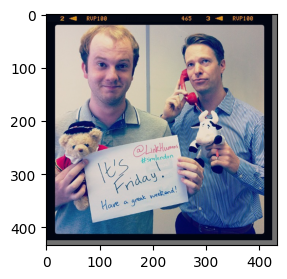

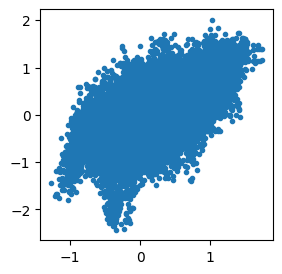

In [44]:
i_img = 7
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
img = data_loader.dataset[i_img].numpy()
img = (img - img.min())/(img.max() - img.min())
ax.imshow(np.transpose(img, (1, 2, 0)))
###########################
outputs = model.forward(data_loader.dataset[i_img][None, ...])
print(outputs[0].shape, outputs[1].shape)
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(outputs[0].clone().detach().cpu().numpy().flatten(), lh_fmri[i_img], '.')
del outputs

89.78823375701904


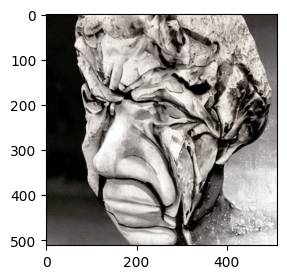

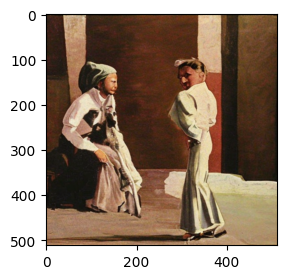

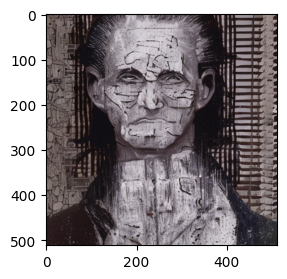

In [48]:
from torchvision.transforms import Resize
resize = Resize((224, 224))


rois_list = ['OFA', 'FFA-1', 'FFA-2']
rois_str = '_'.join(rois_list)
lh_challenge_rois = []
rh_challenge_rois = []
for roi in rois_list:
    roi_ind = model.lh_roi_names.index(roi)
    lh_challenge_rois.append(model.lh_challenge_rois[roi_ind]) 
    rh_challenge_rois.append(model.rh_challenge_rois[roi_ind])
lh_challenge_rois = torch.clip(torch.stack(lh_challenge_rois).sum(0), min=0, max=1).cpu().numpy()
rh_challenge_rois = torch.clip(torch.stack(rh_challenge_rois).sum(0), min=0, max=1).cpu().numpy()


# def loss_function(image_input):
#     outputs = model.forward(image_input)
#     rois_acts = torch.mean(outputs[0] * torch.tensor(lh_challenge_rois).cuda(), axis=1) 
#     rois_acts += torch.mean(outputs[1] * torch.tensor(rh_challenge_rois).cuda(), axis=1)
#     return -torch.mean(rois_acts)

def loss_function(image_input):
    # target_img = resize(data_loader.dataset[i_img][None, ...].cuda())
    # loss = torch.mean(torch.square(image_input - target_img))
    outputs = model.forward(image_input)
    cur_lh_fmri = torch.tensor(lh_fmri[i_img:(i_img+1)]).cuda()
    cur_rh_fmri = torch.tensor(rh_fmri[i_img:(i_img+1)]).cuda()
    loss = torch.mean(torch.square(outputs[0] - cur_lh_fmri) * torch.tensor(lh_challenge_rois).cuda())
    loss += torch.mean(torch.square(outputs[1] - cur_rh_fmri) * torch.tensor(rh_challenge_rois).cuda())
    return loss


fld = '/engram/nklab/ms5724/transformer_brain_encoder/images'
os.makedirs(fld, exist_ok=True)
pipe.brain_tweak = loss_function

import time
time_st = time.time()
for seed in [0, 1, 2]:
    
    gc.collect()
    torch.cuda.empty_cache()
    gc.collect()
    
    g = torch.Generator(device="cuda").manual_seed(int(seed))
    image = pipe("person", sag_scale=0.75, guidance_scale=0.0, num_inference_steps=50, generator=g, clip_guidance_scale=130.0)
    
    image.images[0].save(f'{fld}/{mode}image{i_img}_{model_name}_seed{seed}.png', format="PNG", compress_level=6)
    
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    ax.imshow(image.images[0])
print(time.time() - time_st) #240/3 #29.9-30.1

In [ ]:
# match exclude face and place